<a href="https://colab.research.google.com/github/Amitabhmishra2708/Amit_011/blob/main/logisticemailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas numpy matplotlib scikit-learn


Accuracy: 0.9856502242152466

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



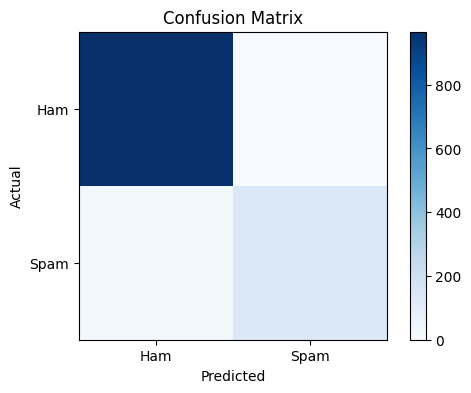


Custom test: Spam


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=["label", "message"])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})


cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['message']).toarray()
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0,1], ["Ham", "Spam"])
plt.yticks([0,1], ["Ham", "Spam"])
plt.show()


def predict_spam(msg):
    msg_vector = cv.transform([msg]).toarray()
    prediction = model.predict(msg_vector)
    return "Spam" if prediction[0] == 1 else "Not Spam"


print("\nCustom test:", predict_spam("You have won $1000! Claim now!"))

